## Time Series Analysis in Python 

### Contents

1. What is a Time Series?
2. How to import Time Series in Python?
3. Visualizing a Time Series
4. Patterns in a Time Series
6. Additive and multiplicative Time Series
7. How to decompose a Time Series into its components?
8. Stationary and non-stationary Time Series
9. How to make a Time Series stationary?
10. How to test for stationarity?
11. What is the difference between white noise and a stationary series?
12. How to detrend a Time Series?
13. How to deseasonalize a Time Series?
14. How to test for seasonality of a Time Series?
15. How to treat missing values in a Time Series?
16. What is autocorrelation and partial autocorrelation functions?
17. How to compute partial autocorrelation function?
18. Lag Plots
19. How to estimate the forecastability of a Time Series?
20. Why and How to smoothen a Time Series?
21. How to use Granger Causality test to know if one Time Series is helpful in forecasting another?
22. What Next

Time series is a sequence of observations recorded at regular time intervals.

Depending on the frequency of observations, a time series may typically be hourly, daily, weekly, monthly, quarterly and annual. Sometimes, you might have seconds and minute-wise time series as well, like, number of clicks and user visits every minute etc.

#### Why even analyze a time series?

Because it is the preparatory step before you develop a forecast of the series.

Besides, time series forecasting has enormous **commercial significance** because stuff that is important to a business like demand and sales, number of visitors to a website, stock price etc are essentially time series data.

#### So what does analyzing a time series involve?

Time series analysis involves understanding various aspects about the inherent nature of the series so that you are better informed to create meaningful and accurate forecasts.

## How to import time series in python?


The data for a time series typically stores in .csv files or other spreadsheet formats and contains two columns: the date and the measured value.

Let’s use the read_excel() in pandas package to read the time series dataset as a pandas dataframe

In [2]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime
import pandas_datareader as web
import seaborn as sns
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

Alternately, you can import it as a pandas Series with the date as index. You just need to specify the index_col argument in the pd.read_csv() to do this.

In [3]:
ser = pd.read_excel('macro2.xlsx', parse_dates=['Date'], index_col='Date')
ser.head()

,BLACKROCK,MICROSOFT,SANDP,CPI,INDPRO,M1SUPPLY,CCREDIT,BMINUSA,USTB3M,USTB10Y
Date,,,,,,,,,,
1999-10-01,14.1250,46.281250,1362.930054,168.2,92.9976,1095.1,1519.3952,0.83,5.02,6.11
1999-11-01,14.7500,45.523399,1388.910034,168.3,93.4440,1113.0,1531.9609,0.79,5.23,6.03
1999-12-01,18.5625,58.375000,1469.250000,168.3,94.1555,1148.2,1553.6220,0.64,5.36,6.28
2000-02-01,17.7500,44.687500,1366.420044,169.8,94.4329,1097.4,1549.3285,0.61,5.73,6.52
2000-03-01,21.7500,53.125000,1498.579956,171.2,94.7926,1108.9,1553.7650,0.69,5.86,6.26


Note, in the series, the ‘value’ column is placed higher than date to imply that it is a series.

### Visualizing a time series

Let’s use matplotlib to visualise the series.

In [4]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


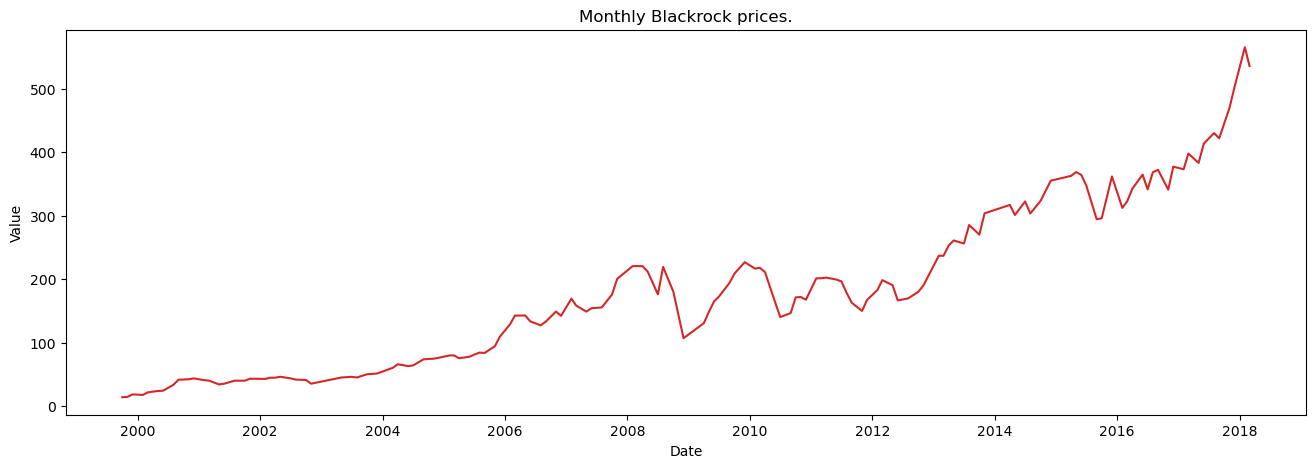

In [5]:
plot_df(ser, x=ser.index, y=ser.BLACKROCK, title='Monthly Blackrock prices.')    

Since all values are positive, you can show this on both sides of the Y axis to emphasize the growth.

In [6]:
print(ser.index.values)

['1999-10-01T00:00:00.000000000' '1999-11-01T00:00:00.000000000'
 '1999-12-01T00:00:00.000000000' '2000-02-01T00:00:00.000000000'
 '2000-03-01T00:00:00.000000000' '2000-05-01T00:00:00.000000000'
 '2000-06-01T00:00:00.000000000' '2000-08-01T00:00:00.000000000'
 '2000-09-01T00:00:00.000000000' '2000-11-01T00:00:00.000000000'
 '2000-12-01T00:00:00.000000000' '2001-02-01T00:00:00.000000000'
 '2001-03-01T00:00:00.000000000' '2001-05-01T00:00:00.000000000'
 '2001-06-01T00:00:00.000000000' '2001-08-01T00:00:00.000000000'
 '2001-10-01T00:00:00.000000000' '2001-11-01T00:00:00.000000000'
 '2002-02-01T00:00:00.000000000' '2002-03-01T00:00:00.000000000'
 '2002-04-01T00:00:00.000000000' '2002-05-01T00:00:00.000000000'
 '2002-07-01T00:00:00.000000000' '2002-08-01T00:00:00.000000000'
 '2002-10-01T00:00:00.000000000' '2002-11-01T00:00:00.000000000'
 '2003-04-01T00:00:00.000000000' '2003-05-01T00:00:00.000000000'
 '2003-07-01T00:00:00.000000000' '2003-08-01T00:00:00.000000000'
 '2003-10-01T00:00:00.000

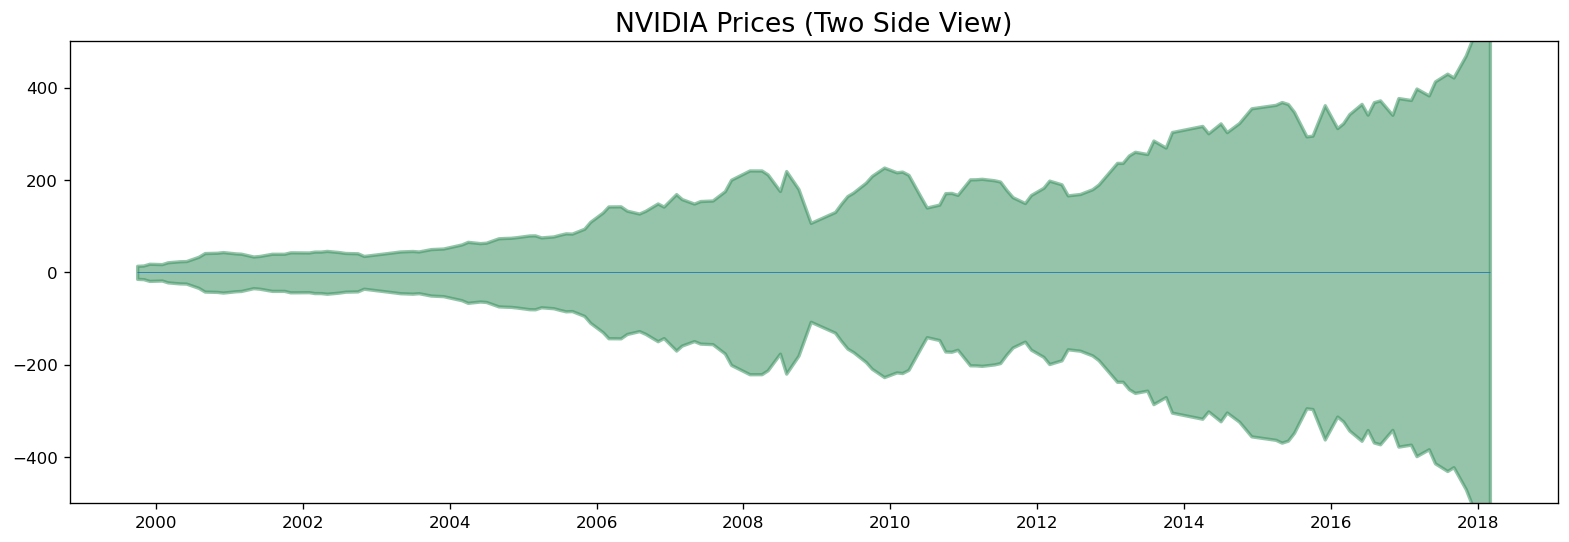

In [7]:
x = ser.index.values
y1 = ser['BLACKROCK']

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-500, 500)
plt.title('NVIDIA Prices (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(ser.index), xmax=np.max(ser.index), linewidth=.5)
plt.show()

Since its a monthly time series it could follows a certain repetitive pattern every year. Therefore, you can plot each year as a separate line in the same plot. This lets you compare the year wise patterns side-by-side.

### Seasonal Plot of a Time Series


In [8]:
#ser2 = pd.read_excel('macro2.xlsx')
#ser2.head()

In [9]:
# Prepare data
ser2 = ser
ser2.sort_index()
ser2.reset_index(inplace=True)

ser2['year'] = [d.year for d in ser2.Date]
ser2['month'] = [d.strftime('%b') for d in ser2.Date]
years = ser2['year'].unique()


In [10]:
ser2[ser2['year'] == 2015]

,Date,BLACKROCK,MICROSOFT,SANDP,CPI,INDPRO,M1SUPPLY,CCREDIT,BMINUSA,USTB3M,USTB10Y,year,month
117,2015-04-01,362.570007,48.639999,2085.510010,236.599,104.5604,3035.4,3343.7291,0.96,0.02,1.94,2015,Apr
118,2015-05-01,368.640015,46.860001,2107.389893,237.805,104.0675,2975.9,3366.1704,0.91,0.02,2.20,2015,May
119,2015-06-01,364.269989,44.150002,2063.110107,238.638,103.6891,3020.7,3394.7956,0.94,0.02,2.36,2015,Jun
120,2015-07-01,347.399994,46.700001,2103.840088,238.654,104.2443,3038.4,3411.9871,1.05,0.03,2.32,2015,Jul
121,2015-09-01,294.299988,44.259998,1920.030029,237.945,103.7281,3016.3,3478.5390,1.27,0.02,2.17,2015,Sep
122,2015-10-01,295.920013,52.639999,2079.360107,237.838,103.3569,3011.9,3490.0470,1.39,0.02,2.07,2015,Oct
123,2015-12-01,361.730011,55.480000,2043.939941,236.525,102.2696,3141.1,3413.6115,1.49,0.23,2.24,2015,Dec


In [11]:
#for i, y in enumerate(years):
#plt.plot('month', 'BLACKROCK', data=ser2.loc[ser2.year==1999])
#plt.plot('month', 'BLACKROCK', data=ser2.loc[ser2.year==2000])
#plt.plot('month', 'BLACKROCK', data=ser2.loc[ser2.year==2001])
#plt.plot('month', 'BLACKROCK', data=ser2.loc[ser2.year==2002])
#plt.plot('month', 'BLACKROCK', data=ser2.loc[ser2.year==2003])


np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)





/home/cabito/anaconda3/envs/metodos/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/cabito/anaconda3/envs/metodos/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/cabito/anaconda3/envs/metodos/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

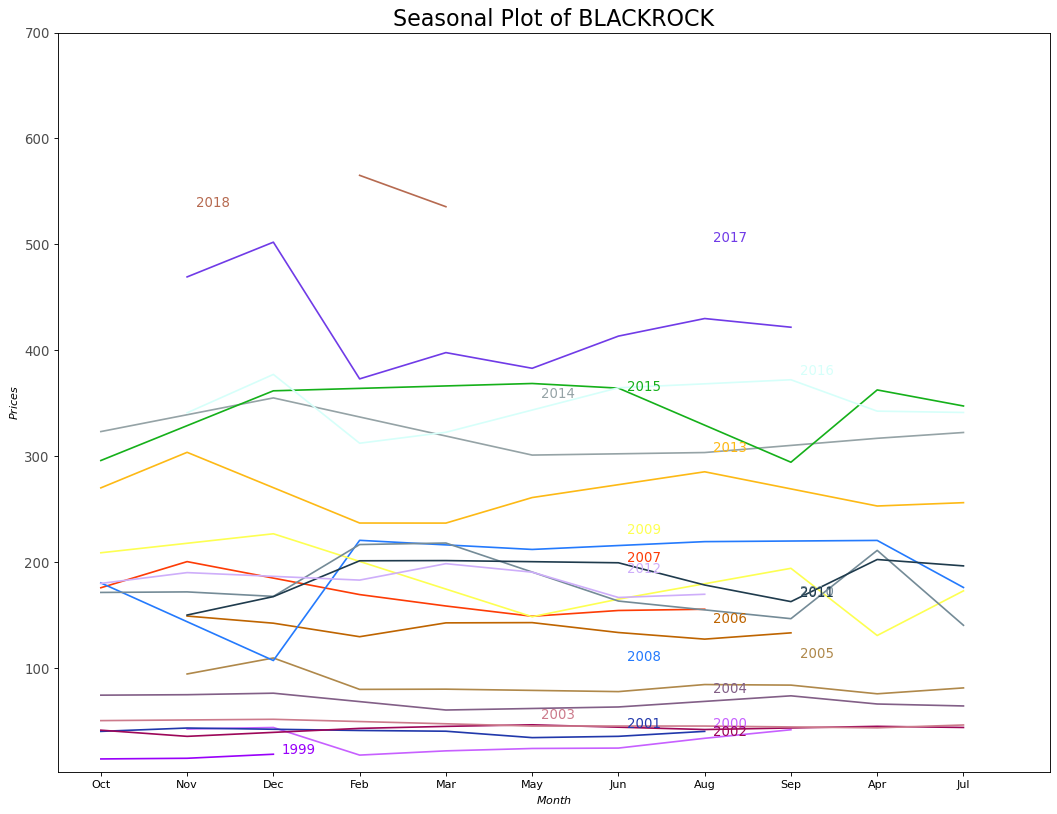

In [12]:
#ser2  = new_df
ser2 = pd.read_excel('macro2.xlsx')
ser2.sort_index()
ser2.reset_index(inplace=True)
ser2

# Prepare data
ser2['year'] = [d.year for d in ser2.Date]
ser2['month'] = [d.strftime('%b') for d in ser2.Date]
years = ser2['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y, in enumerate(years):
    sns.lineplot('month', 'BLACKROCK', data=ser2.loc[ser2.year==y],color= mycolors[i])
    plt.text(ser2.loc[ser2.year==y, :].shape[0]-.9, ser2.loc[ser2.year==y, 'BLACKROCK'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.5, 11), ylim=(2,700), ylabel='$Prices$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of BLACKROCK", fontsize=20)
plt.show()

## Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution

You can group the data at seasonal intervals and see how the values are distributed within a given year or month and how it compares over time.

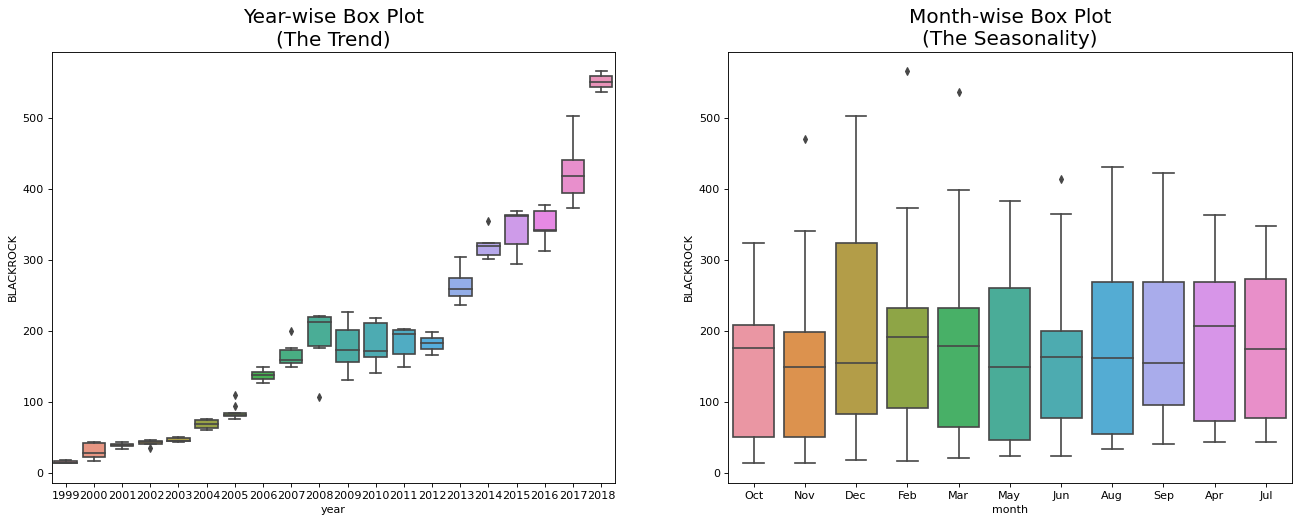

In [13]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='BLACKROCK', data=ser2, ax=axes[0])
sns.boxplot(x='month', y='BLACKROCK', data=ser2.loc[~ser2.year.isin([1998, 2019]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

The boxplots make the year-wise and month-wise distributions evident. 

So far, we have seen the similarities to identify the pattern. Now, how to find out any deviations from the usual pattern?

### Patterns in a time series

Any time series may be split into the following components: Base Level + Trend + Seasonality + Error

A trend is observed when there is an increasing or decreasing slope observed in the time series. Whereas seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.

However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality. The opposite can also be true.

So, a time series may be imagined as a combination of the trend, seasonality and the error terms.

Another aspect to consider is the cyclic behaviour. It happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. Care should be taken to not confuse ‘cyclic’ effect with ‘seasonal’ effect.

So, How to diffentiate between a ‘cyclic’ vs ‘seasonal’ pattern?

If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.

## Additive and multiplicative time series

Depending on the nature of the trend and seasonality, a time series can be modeled as an additive or multiplicative, wherein, each observation in the series can be expressed as either a sum or a product of the components:

Additive time series:
Value = Base Level + Trend + Seasonality + Error

Multiplicative Time Series:
Value = Base Level x Trend x Seasonality x Error

### How to decompose a time series into its components?

You can do a classical decomposition of a time series by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.

The seasonal_decompose in statsmodels implements this conveniently.

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [15]:
ser = pd.read_excel('macro2.xlsx', parse_dates=['Date'], index_col='Date')
ser.sort_index(inplace = True)
ser.head()

,BLACKROCK,MICROSOFT,SANDP,CPI,INDPRO,M1SUPPLY,CCREDIT,BMINUSA,USTB3M,USTB10Y
Date,,,,,,,,,,
1999-10-01,14.1250,46.281250,1362.930054,168.2,92.9976,1095.1,1519.3952,0.83,5.02,6.11
1999-11-01,14.7500,45.523399,1388.910034,168.3,93.4440,1113.0,1531.9609,0.79,5.23,6.03
1999-12-01,18.5625,58.375000,1469.250000,168.3,94.1555,1148.2,1553.6220,0.64,5.36,6.28
2000-02-01,17.7500,44.687500,1366.420044,169.8,94.4329,1097.4,1549.3285,0.61,5.73,6.52
2000-03-01,21.7500,53.125000,1498.579956,171.2,94.7926,1108.9,1553.7650,0.69,5.86,6.26


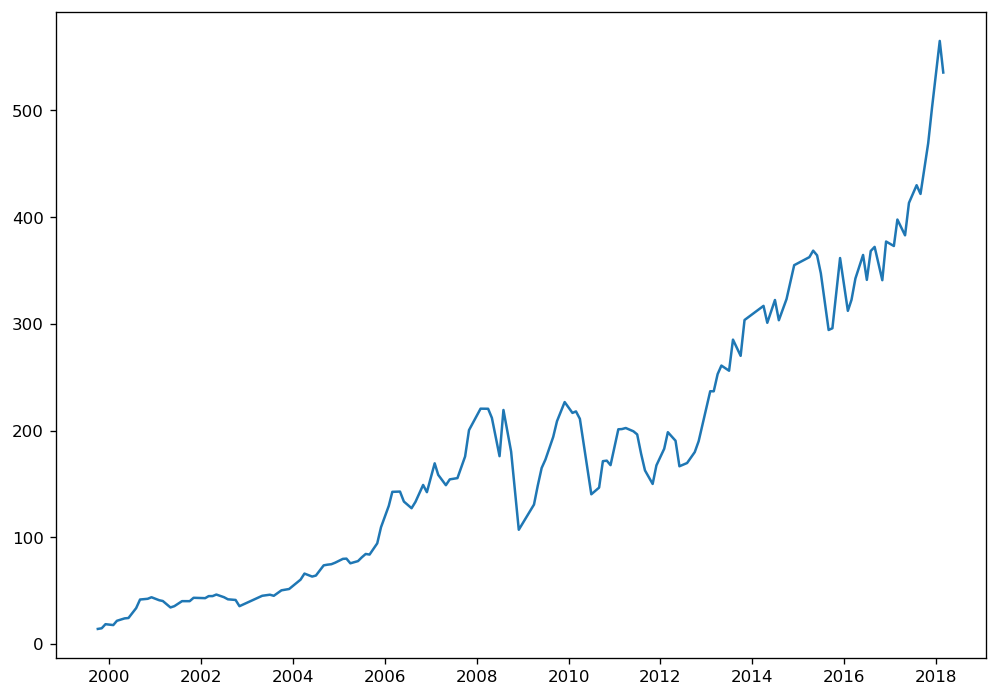

In [16]:
plt.plot('Date', 'BLACKROCK', data = ser2)

In [34]:

ser2.head()
ser3 = ser2.copy()
ser3['index'] = pd.to_datetime(ser3['index'])
ser3['Date'] = pd.to_datetime(ser3['Date'], format = '%y%m%d')
ser3.head()
ser3.dropna()
ser3.set_index('Date')


,index,BLACKROCK,MICROSOFT,SANDP,CPI,INDPRO,M1SUPPLY,CCREDIT,BMINUSA,USTB3M,USTB10Y,year,month
Date,,,,,,,,,,,,,
1999-10-01,1970-01-01 00:00:00.000000000,14.125000,46.281250,1362.930054,168.200,92.9976,1095.1,1519.3952,0.83,5.02,6.11,1999,Oct
1999-11-01,1970-01-01 00:00:00.000000001,14.750000,45.523399,1388.910034,168.300,93.4440,1113.0,1531.9609,0.79,5.23,6.03,1999,Nov
1999-12-01,1970-01-01 00:00:00.000000002,18.562500,58.375000,1469.250000,168.300,94.1555,1148.2,1553.6220,0.64,5.36,6.28,1999,Dec
2000-02-01,1970-01-01 00:00:00.000000003,17.750000,44.687500,1366.420044,169.800,94.4329,1097.4,1549.3285,0.61,5.73,6.52,2000,Feb
2000-03-01,1970-01-01 00:00:00.000000004,21.750000,53.125000,1498.579956,171.200,94.7926,1108.9,1553.7650,0.69,5.86,6.26,2000,Mar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-01,1970-01-01 00:00:00.000000138,421.779999,74.489998,2519.360107,246.819,103.1760,3526.2,3753.9943,0.67,1.05,2.20,2017,Sep
2017-11-01,1970-01-01 00:00:00.000000139,469.290009,84.169998,2584.840088,246.669,105.2943,3580.8,3804.8885,0.70,1.25,2.35,2017,Nov
2017-12-01,1970-01-01 00:00:00.000000140,502.079987,85.540001,2673.610107,246.524,105.7183,3636.4,3834.5986,0.71,1.34,2.40,2017,Dec


In [36]:
# Multiplicative Decomposition 

#result_mul = seasonal_decompose(ser3['BLACKROCK'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(ser3['BLACKROCK'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

Setting extrapolate_trend='freq' takes care of any missing values in the trend and residuals at the beginning of the series.

If you look at the residuals of the additive decomposition closely, it has some pattern left over. The multiplicative decomposition, however, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

The numerical output of the trend, seasonal and residual components are stored in the result_mul output itself. Let’s extract them and put it in a dataframe.

In [83]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)

df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()


NameError: name 'result_mul' is not defined

If you check, the product of seas, trend and resid columns should exactly equal to the actual_values.

### Stationary and Non-Stationary Time Series

Stationarity is a property of a time series. A stationary series is one where the values of the series is not a function of time.

That is, the statistical properties of the series like mean, variance and autocorrelation are constant over time. Autocorrelation of the series is nothing but the correlation of the series with its previous values, more on this coming up.

A stationary time series id devoid of seasonal effects as well.

So how to identify if a series is stationary or not? Let’s plot some examples to make it clear:

In [39]:
# import image module
from IPython.display import Image


# get the image
Image(url="https://www.machinelearningplus.com/wp-content/uploads/2019/02/stationary-and-non-stationary-time-series.png", width=800, height=800)

The above image is sourced from R’s TSTutorial.

So why does a stationary series matter? why am I even talking about it?

I will come to that in a bit, but understand that it is possible to make nearly any time series stationary by applying a suitable transformation. Most statistical forecasting methods are designed to work on a stationary time series. The first step in the forecasting process is typically to do some transformation to convert a non-stationary series to stationary.

You can make series stationary by:

* Differencing the Series (once or more)
* Take the log of the series
* Take the nth root of the series
* Combination of the above
* The most common and convenient method to stationarize the series is by differencing the series at least once until it becomes approximately stationary.

So what is differencing?

If Y_t is the value at time ‘t’, then the first difference of Y = Yt – Yt-1. In simpler terms, differencing the series is nothing but subtracting the next value by the current value.

If the first difference doesn’t make a series stationary, you can go for the second differencing. And so on.

For example, consider the following series: [1, 5, 2, 12, 20]

First differencing gives: [5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]

## Why make a non-stationary series stationary before forecasting?

Forecasting a stationary series is relatively easy and the forecasts are more reliable.

An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.

We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

Now that we’ve established that stationarizing the series important, how do you check if a given series is stationary or not?

### How to test for stationarity?

The stationarity of a series can be established by looking at the plot of the series like we did earlier.

Another method is to split the series into 2 or more contiguous parts and computing the summary statistics like the mean, variance and the autocorrelation. If the stats are quite different, then the series is not likely to be stationary.

Nevertheless, you need a method to quantitatively determine if a given series is stationary or not. This can be done using statistical tests called ‘Unit Root Tests’. There are multiple variations of this, where the tests check if a time series is non-stationary and possess a unit root.

There are multiple implementations of Unit Root tests like:

* Augmented Dickey Fuller test (ADH Test)
* Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
* Philips Perron test (PP Test)

The most commonly used is the ADF test, where the null hypothesis is the time series possesses a unit root and is non-stationary. So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis.

The KPSS test, on the other hand, is used to test for trend stationarity. The null hypothesis and the P-Value interpretation is just the opposite of ADH test. The below code implements these two tests using statsmodels package in python.

In [40]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(ser.BLACKROCK.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(ser.BLACKROCK.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')

ADF Statistic: 1.8442202138207417
p-value: 0.998432803631509
Critial Values:
   1%, -3.480118600110386
Critial Values:
   5%, -2.8833618426136196
Critial Values:
   10%, -2.578407034974382

KPSS Statistic: 1.580258
p-value: 0.010000
Critial Values:
Critial Values:
Critial Values:
Critial Values:


/home/cabito/anaconda3/envs/metodos/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


### What is the difference between white noise and a stationary series?

Like a stationary series, the white noise is also not a function of time, that is its mean and variance does not change over time. But the difference is, the white noise is completely random with a mean of 0.

In white noise there is no pattern whatsoever. If you consider the sound signals in an FM radio as a time series, the blank sound you hear between the channels is white noise.

Mathematically, a sequence of completely random numbers with mean zero is a white noise.


<AxesSubplot:title={'center':'Random White Noise'}>

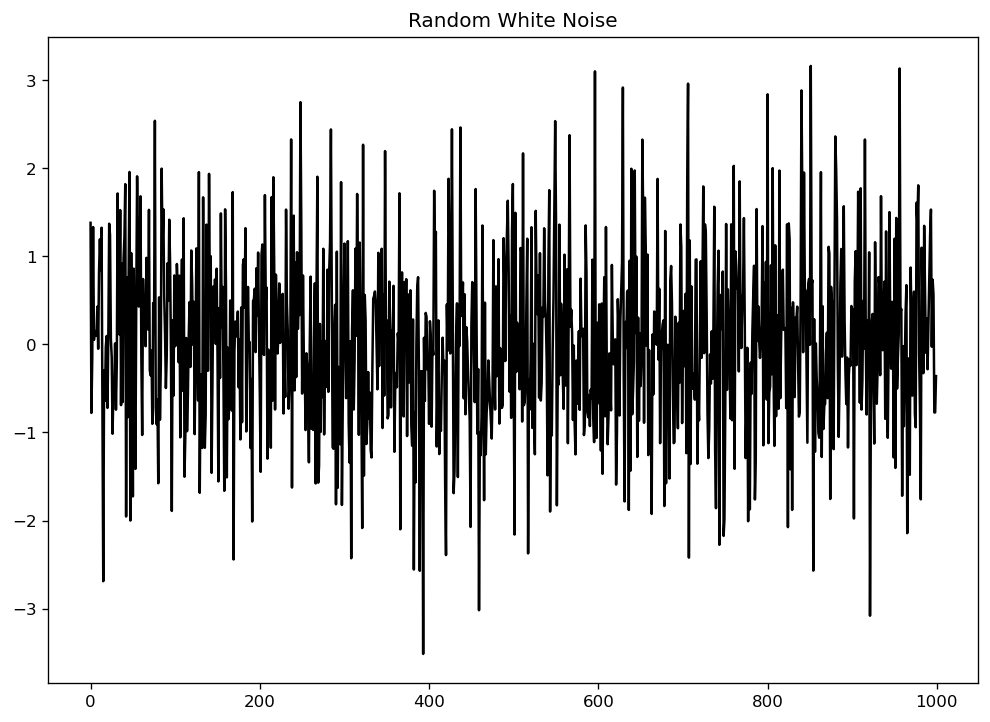

In [41]:
randvals = np.random.randn(1000)
pd.Series(randvals).plot(title='Random White Noise', color='k')

### How to detrend a time series?

Detrending a time series is to remove the trend component from a time series. But how to extract the trend? There are multiple approaches.

* Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, you may want to use quadratic terms (x^2) in the model.

* Subtract the trend component obtained from time series decomposition we saw earlier.

* Subtract the mean

Apply a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.

Let’s implement the first two methods.

Text(0.5, 1.0, 'BLACKROCK detrended by subtracting the least squares fit')

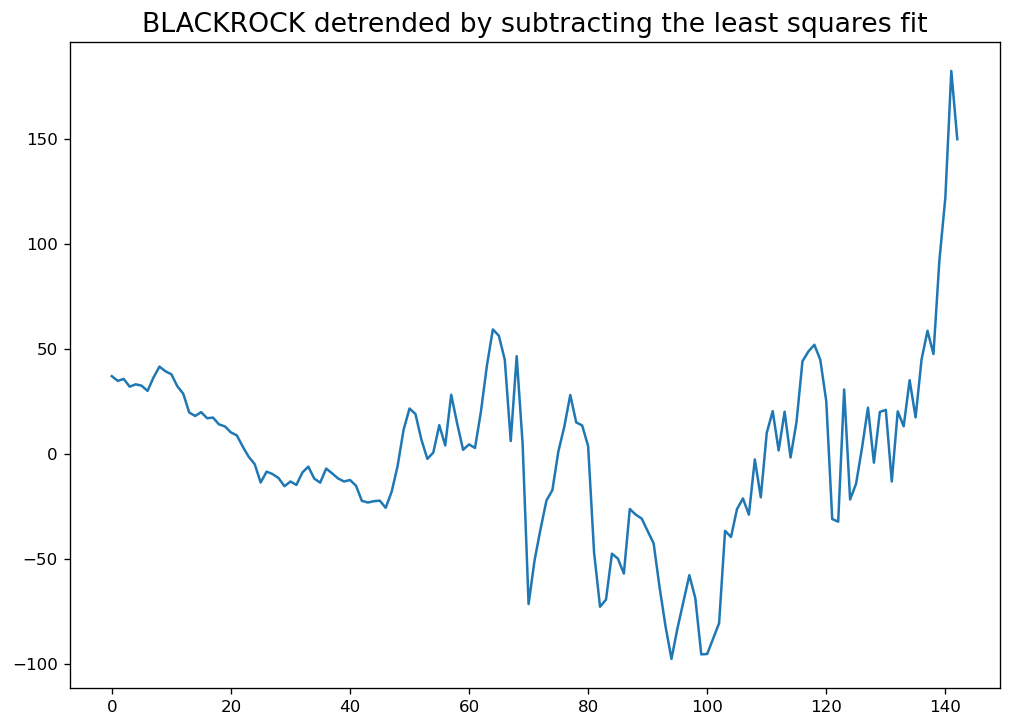

In [42]:
# Using scipy: Subtract the line of best fit
from scipy import signal

detrended = signal.detrend(ser.BLACKROCK.values)
plt.plot(detrended)
plt.title('BLACKROCK detrended by subtracting the least squares fit', fontsize=16)

In [43]:
# Using statmodels: Subtracting the Trend Component.

from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(ser['MICROSOFT'], model='multiplicative', extrapolate_trend='freq')

detrended = ser.BLACKROCK.values - result_mul.trend

plt.plot(detrended)
plt.title('MICROSOFT detrended by subtracting the trend component', fontsize=16)

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

## How to deseasonalize a time series?

There are multiple approaches to deseasonalize a time series as well. Below are a few:

1. Take a moving average with length as the seasonal window. This will smoothen in series in the process.

2. Seasonal difference the series (subtract the value of previous season from the current value)

3. Divide the series by the seasonal index obtained from STL decomposition

If dividing by the seasonal index does not work well, try taking a log of the series and then do the deseasonalizing. You can later restore to the original scale by taking an exponential.

In [44]:
# Subtracting the Trend Component.

# Time Series Decomposition
result_mul = seasonal_decompose(ser['BLACKROCK'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = ser.BLACKROCK.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('BLACKROCK PRICES Deseasonalized', fontsize=10)
plt.plot()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

## How to test for seasonality of a time series?

The common way is to plot the series and check for repeatable patterns in fixed time intervals. So, the types of seasonality is determined by the clock or the calendar:

* Hour of day
* Day of month
* Weekly
* Monthly
* Yearly

However, if you want a more definitive inspection of the seasonality, use the Autocorrelation Function (ACF) plot. More on the ACF in the upcoming sections. But when there is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window.

I must caution you that in real word datasets such strong patterns is hardly noticed and can get distorted by any noise, so you need a careful eye to capture these patterns.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

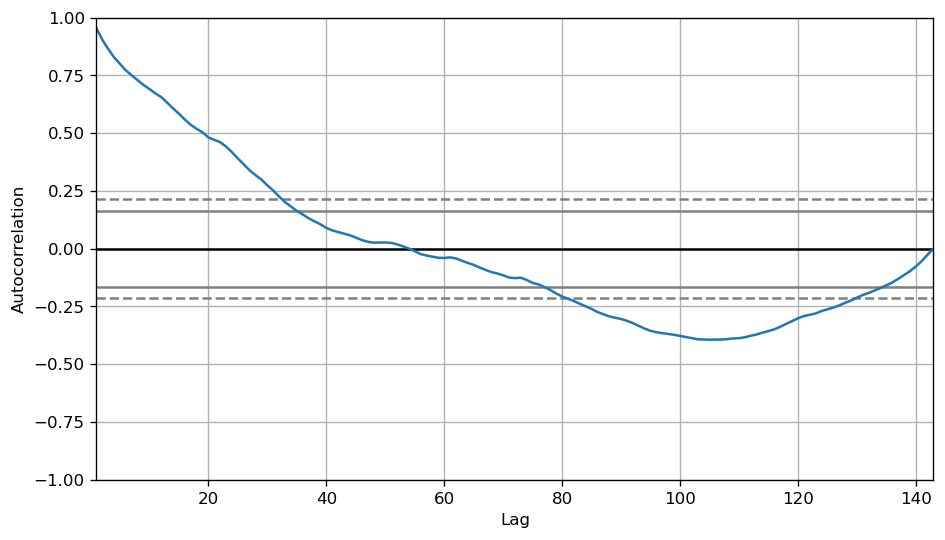

In [45]:
from pandas.plotting import autocorrelation_plot


# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(ser.BLACKROCK.tolist())

### What is autocorrelation and partial autocorrelation functions?

Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

/home/cabito/anaconda3/envs/metodos/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


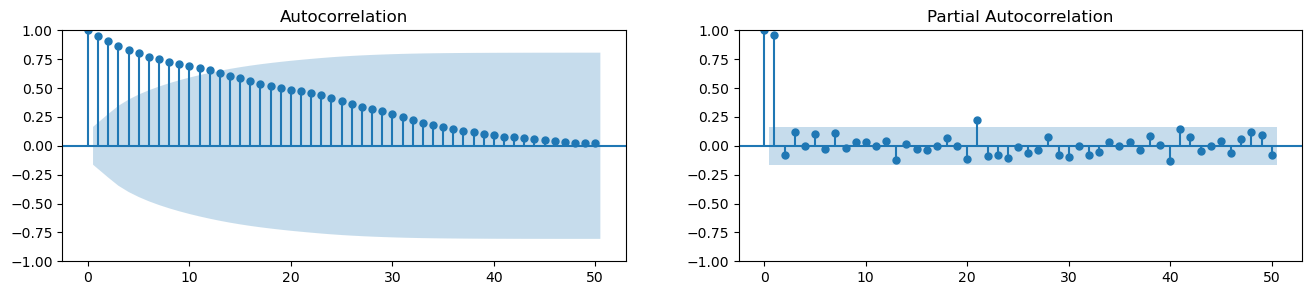

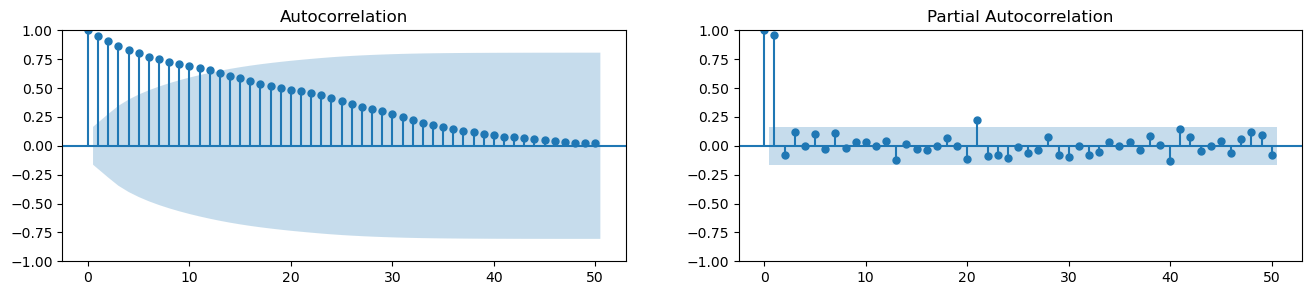

In [46]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(ser.BLACKROCK.tolist(), lags=50, ax=axes[0])
plot_pacf(ser.BLACKROCK.tolist(), lags=50, ax=axes[1])

### How to compute partial autocorrelation function?

So how to compute partial autocorrelation?

The partial autocorrelation of lag (k) of a series is the coefficient of that lag in the autoregression equation of Y. The autoregressive equation of Y is nothing but the linear regression of Y with its own lags as predictors.

For Example, if Y_t is the current series and Y_t-1 is the lag 1 of Y, then the partial autocorrelation of lag 3 (Y_t-3) is the coefficient $\alpha_3$ of Y_t-3 in the following equation:

For Example, if Y_t is the current series and Y_t-1 is the lag 1 of Y, then the partial autocorrelation of lag 3 (Y_t-3) is the coefficient $\alpha_3$ of Y_t-3 in the following equation:

$ Y_t = \alpha_0+ \alpha_1Y_{t-1}+\alpha_2Y_{t-2}+ \alpha_3Y_{t-3}$

### Lag Plots

A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series like the one you see below, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

In below example on Microsoft time series, the plots get more and more scattered as the n_lag increases.

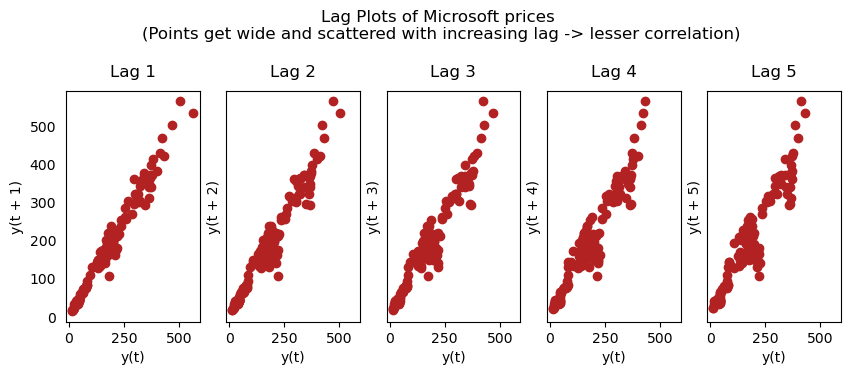

In [47]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})


# Plot
fig, axes = plt.subplots(1, 5, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:5]):
    lag_plot(ser.BLACKROCK, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Microsoft prices \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    
  
plt.show()

### Why and How to smoothen a time series?

Smoothening of a time series may be useful in:

Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.
The smoothed version of series can be used as a feature to explain the original series itself.
Visualize the underlying trend better
So how to smoothen a series? Let’s discuss the following methods:

* Take a moving average
* Do a LOESS smoothing (Localized Regression)
* Do a LOWESS smoothing (Locally Weighted Regression)

Moving average is nothing but the average of a rolling window of defined width. But you must choose the window-width wisely, because, large window-size will over-smooth the series. For example, a window-size equal to the seasonal duration (ex: 12 for a month-wise series), will effectively nullify the seasonal effect.

LOESS, short for 'LOcalized regrESSion' fits multiple regressions in the local neighborhood of each point. It is implemented in the statsmodels package, where you can control the degree of smoothing using frac argument which specifies the percentage of data points nearby that should be considered to fit a regression model.

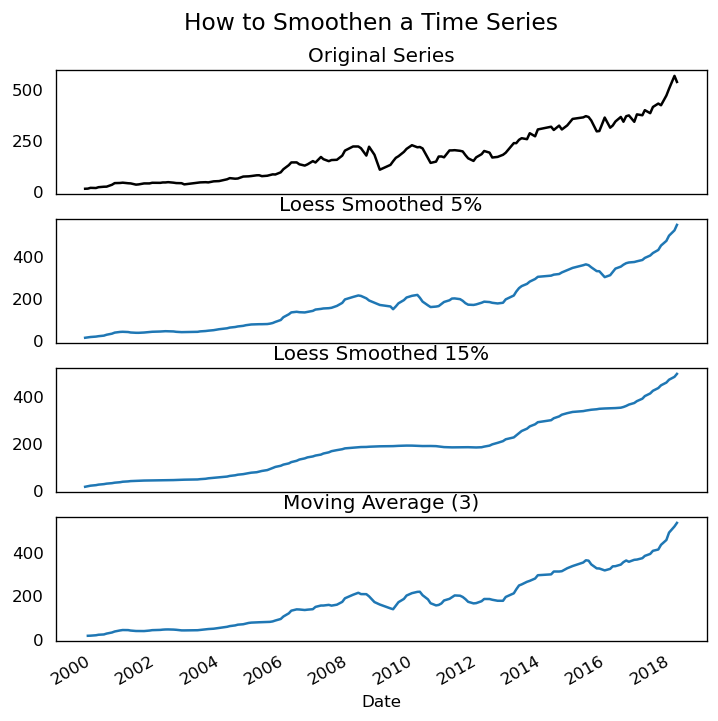

In [49]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# 1. Moving Average
df_ma = ser.BLACKROCK.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(ser.BLACKROCK, np.arange(len(ser.BLACKROCK)), frac=0.05)[:, 1], index=ser.index, columns=['BLACKROCK'])
df_loess_15 = pd.DataFrame(lowess(ser.BLACKROCK, np.arange(len(ser.BLACKROCK)), frac=0.15)[:, 1], index=ser.index, columns=['BLACKROCK'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
ser['BLACKROCK'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['BLACKROCK'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['BLACKROCK'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

### How to use Granger Causality test to know if one time series is helpful in forecasting another?

Granger causality test is used to determine if one time series will be useful to forecast another.

How does Granger causality test work?

It is based on the idea that if X causes Y, then the forecast of Y based on previous values of Y AND the previous values of X should outperform the forecast of Y based on previous values of Y alone.

So, understand that Granger causality should not be used to test if a lag of Y causes Y. Instead, it is generally used on exogenous (not Y lag) variables only.

It is nicely implemented in the statsmodel package.

It accepts a 2D array with 2 columns as the main argument. The values are in the first column and the predictor (X) is in the second column.

The Null hypothesis is: the series in the second column, does not Granger cause the series in the first. If the P-Values are less than a significance level (0.05) then you reject the null hypothesis and conclude that the said lag of X is indeed useful.

The second argument maxlag says till how many lags of Y should be included in the test.

In [50]:
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(ser[['BLACKROCK', 'SANDP']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.8082  , p=0.0101  , df_denom=139, df_num=1
ssr based chi2 test:   chi2=6.9552  , p=0.0084  , df=1
likelihood ratio test: chi2=6.7902  , p=0.0092  , df=1
parameter F test:         F=6.8082  , p=0.0101  , df_denom=139, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=14.9127 , p=0.0000  , df_denom=136, df_num=2
ssr based chi2 test:   chi2=30.9218 , p=0.0000  , df=2
likelihood ratio test: chi2=27.9575 , p=0.0000  , df=2
parameter F test:         F=14.9127 , p=0.0000  , df_denom=136, df_num=2


{1: ({'ssr_ftest': (6.8082160339227435, 0.01006721482860147, 139.0, 1),
   'ssr_chi2test': (6.955155948323954, 0.008357801350184409, 1),
   'lrtest': (6.79018954818639, 0.009166017558667404, 1),
   'params_ftest': (6.808216033922816, 0.010067214828601182, 139.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (14.912663089908479, 1.3943996766333782e-06, 136.0, 2),
   'ssr_chi2test': (30.92184552466317, 1.929330185677972e-07, 2),
   'lrtest': (27.957493632718524, 8.493904890734048e-07, 2),
   'params_ftest': (14.912663089908342, 1.394399676633545e-06, 136.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In the above case, the P-Values are Zero for all tests. So the ‘month’ indeed can be used to forecast Microsoft.

### What Next

That’s it for now. We started from the very basics and understood various characteristics of a time series. Once the analysis is done the next step is to begin forecasting.

Now, we will walk you through the in-depth process of building time series forecasting models using ARIMA.